<a href="https://colab.research.google.com/github/rakesh-jain/machine_learning_projects/blob/main/house_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv("/content/sample_data/california_housing_train.csv")
test = pd.read_csv("/content/sample_data/california_housing_test.csv")

In [4]:
train.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
train.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0


In [6]:
print(f"row(training set):${train.shape[0]}, col(number of features ${train.shape[1]}")

row(training set):$17000, col(number of features $9


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


<Axes: >

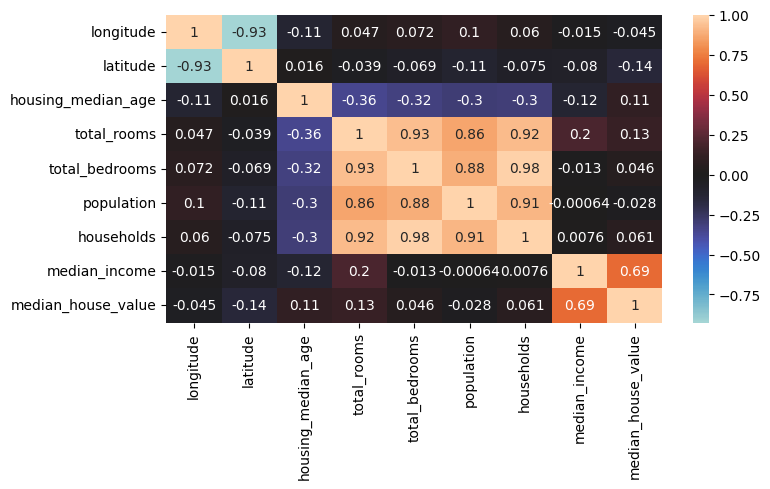

In [8]:
plt.figure(figsize=(8,4))
sns.heatmap(train.corr(),annot =True,center=0)

In [9]:
wmhouse_df = train.copy()
wmhouse_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [10]:
scaler = StandardScaler()
cols = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']

train_scaled = scaler.fit_transform(train[cols])
test_scaled = scaler.transform(test[cols])

y_train = train['median_house_value']
y_test = test['median_house_value']

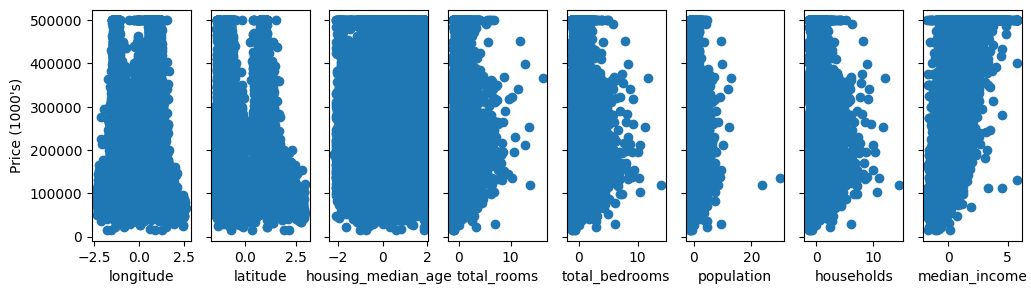

In [11]:
fig,ax=plt.subplots(1, len(cols), figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(train_scaled[:,i],y_train)
    ax[i].set_xlabel(cols[i])
ax[0].set_ylabel("Price (1000's)")
plt.show()

In [12]:
sgdr = SGDRegressor(max_iter=1000, tol=1e-3)
sgdr.fit(train_scaled, y_train)

SGDRegressor()

In [13]:
y_pred = sgdr.predict(test_scaled)
print(y_pred)
print(f"w {sgdr.coef_} , b{sgdr.intercept_} ")

[351360.4657776  210970.86589022 272811.10601036 ...  93118.61273493
 147325.69088969 454562.92580442]
w [-85421.60190354 -91052.5521048   12240.58572599 -17642.52244743
  44674.31014227 -45722.69830667  21166.09806007  77092.64955889] , b[206824.129318] 


In [14]:
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 4872149366.13
R² Score: 0.62


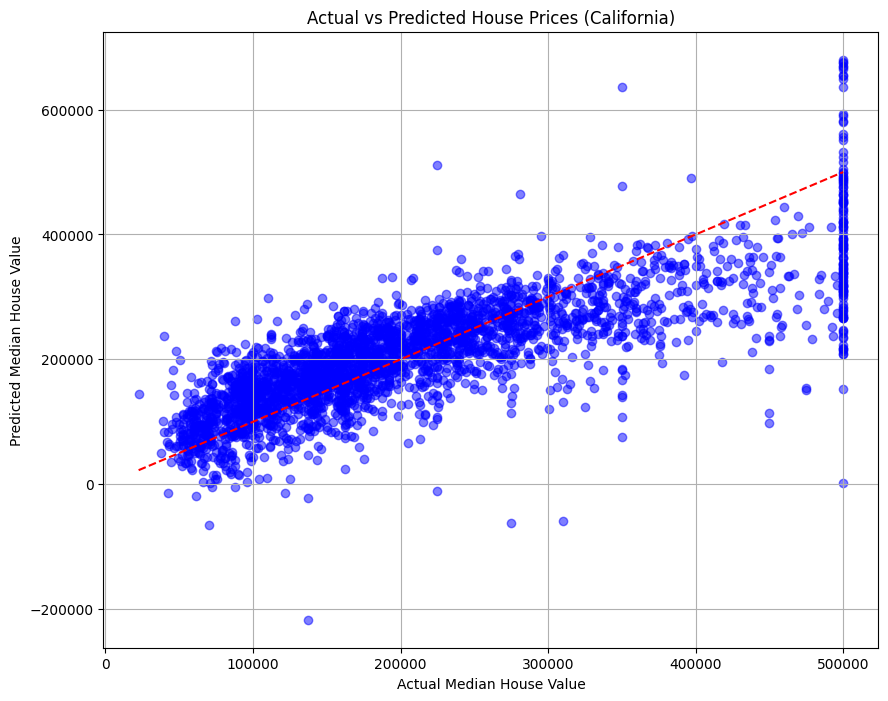

In [15]:
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted House Prices (California)")
plt.grid(True)
plt.show()

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

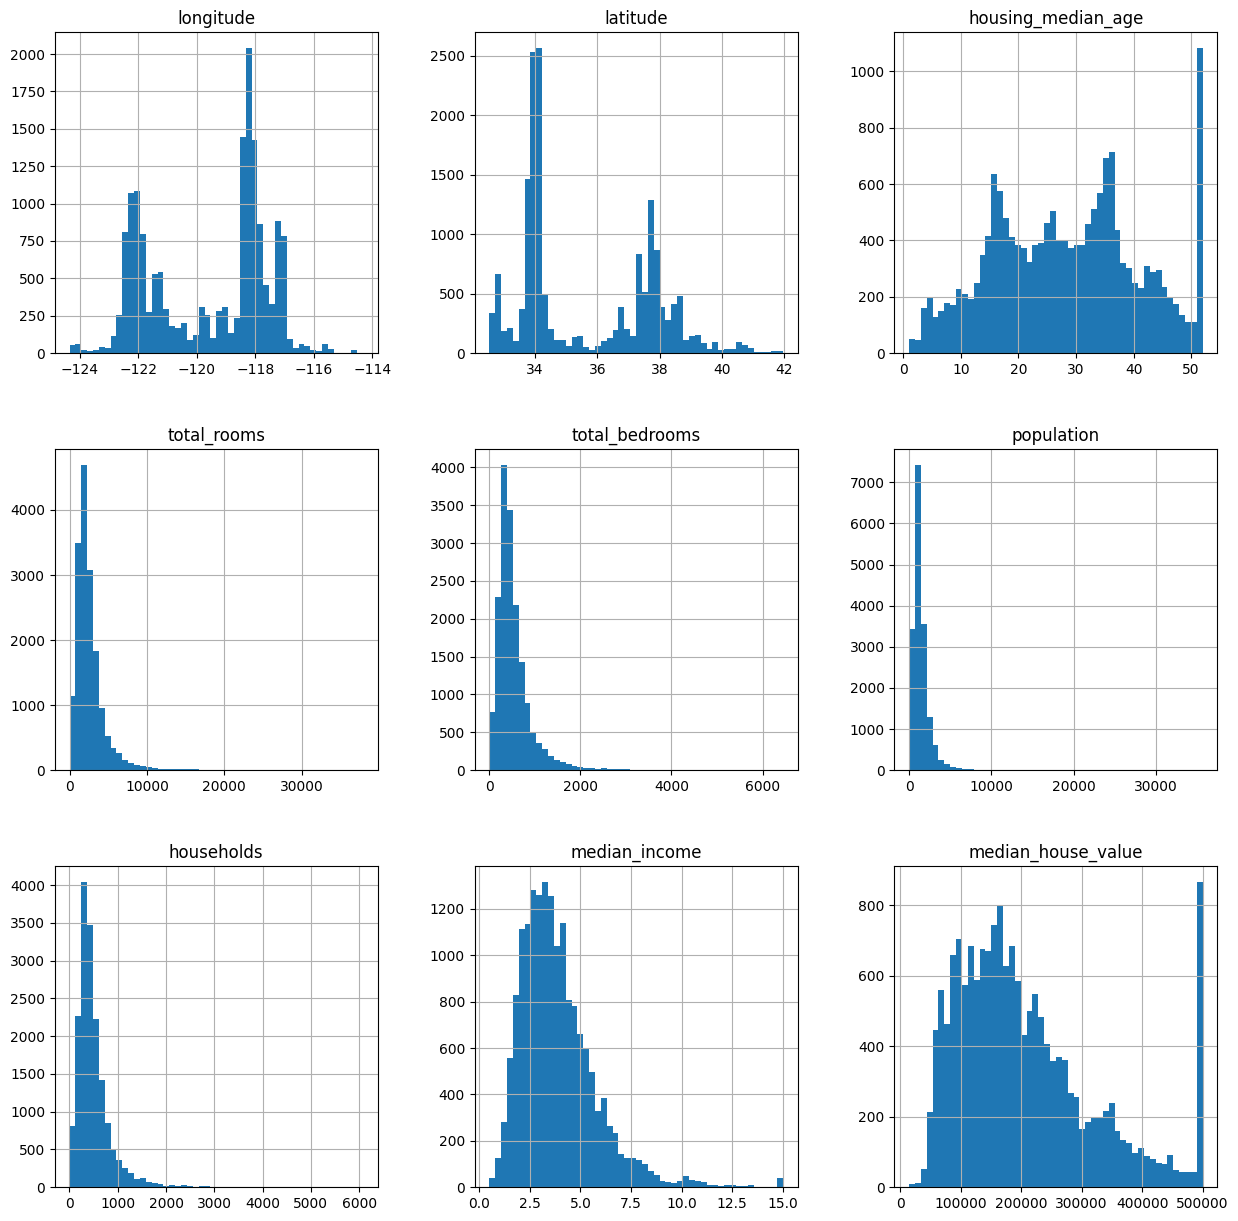

In [16]:
train.hist(bins=50, figsize=(15, 15))

In [18]:
BBox = (train.longitude.min(),   train.longitude.max(),
        train.latitude.min(), train.latitude.max())

In [24]:
ruh_m = plt.imread('/content/sample_data/california-map')

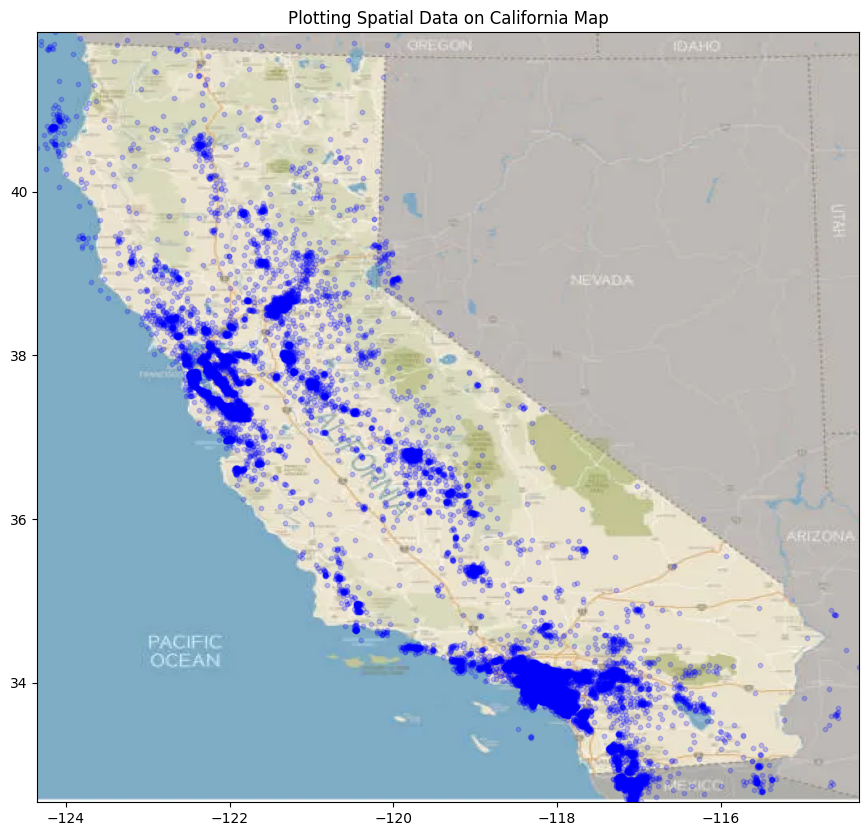

In [25]:
fig, ax = plt.subplots(figsize = (15,10))
ax.scatter(train.longitude, train.latitude, zorder=1, alpha= 0.2, c='blue', s=10)
ax.set_title('Plotting Spatial Data on California Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')